# Q5. Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

In [2]:
df = pd.read_excel("~chetandeshpande/downloads/MLR_data.xlsx")

In [3]:
df.head()

,X1,X2,Y
0,15.31,57.3,74.8
1,15.20,63.8,74.0
2,16.25,65.4,72.9
3,14.33,57.0,70.0
4,14.57,63.8,74.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      20 non-null     float64
 1   X2      20 non-null     float64
 2   Y       20 non-null     float64
dtypes: float64(3)
memory usage: 608.0 bytes


In [5]:
X = df[['X1','X2']]
y = df['Y']

In [6]:
X = sm.add_constant(X)

In [7]:
model = sm.OLS(y, X).fit()

In [8]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     46.99
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           1.19e-07
Time:                        11:47:58   Log-Likelihood:                -50.526
No. Observations:                  20   AIC:                             107.1
Df Residuals:                      17   BIC:                             110.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.1094      7.253      4.565      0.0

In [9]:
# R-Squared = 0.847

In [10]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X) 
rmse = np.sqrt(mean_squared_error(y, y_pred))  
print("RMSE:", rmse)

RMSE: 3.026422801154147


In [11]:
# RMSE = 3.0264

In [12]:
# The F-statistic and test statistical significance at α = 0.05

In [13]:
f_stat = model.fvalue
f_pval = model.f_pvalue

# Print the results
print("F-statistic:", f_stat)
print("p-value for F-statistic:", f_pval)

# Test significance at α = 0.05
alpha = 0.05
if f_pval < alpha:
    print("Reject H0: Model is statistically significant at α = 0.05")
else:
    print("Fail to reject H0: Model is not statistically significant")

F-statistic: 46.98986914191224
p-value for F-statistic: 1.1864362651573306e-07
Reject H0: Model is statistically significant at α = 0.05


In [14]:
# p-value=0.0000001186≪0.05, model is statistically significant at α = 0.05

# Q7. Discriminant Analysis

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [16]:
data = pd.read_csv("~chetandeshpande/downloads/Discriminant_Analysis_Data_Q7.csv")

In [17]:
data.head()

,Group,GRE,GMAT
0,1,2.96,596
1,1,3.14,473
2,1,3.22,482
3,1,3.29,527
4,1,3.69,505


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   85 non-null     int64  
 1   GRE     85 non-null     float64
 2   GMAT    85 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 2.1 KB


In [19]:
data.nunique()

Group     3
GRE      67
GMAT     72
dtype: int64

In [20]:
# i) Data Splitting

In [21]:
X = data[['GRE', 'GMAT']]  
y = data['Group'] 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 68
Testing set size: 17


In [24]:
data.shape

(85, 3)

In [25]:
# (ii) Linear Discriminant Analysis (LDA)

In [26]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [27]:
y_pred_lda = lda.predict(X_test)

In [28]:
# (iii) Confusion Matrix and determine the Accuracy

In [29]:
print("LDA Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lda))

LDA Confusion Matrix:
[[6 0 0]
 [0 6 0]
 [0 0 5]]


In [30]:
print("\nLDA Classification Report:")
print(classification_report(y_test, y_pred_lda))


LDA Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         5

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



In [31]:
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))

LDA Accuracy: 1.0


In [32]:
# (iv) Quadratic Discriminant Analysis (QDA)

In [33]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [34]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [35]:
y_pred_qda = qda.predict(X_test)

In [36]:
cm_qda = confusion_matrix(y_test, y_pred_qda)
print("QDA Confusion Matrix:\n", cm_qda)

QDA Confusion Matrix:
 [[6 0 0]
 [0 6 0]
 [0 0 5]]


In [37]:
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print("\nQDA Accuracy:", accuracy_qda)


QDA Accuracy: 1.0


In [38]:
report_qda = classification_report(y_test, y_pred_qda, target_names=["Admit (1)", "Not Admit (2)", "Borderline (3)"])
print("\nQDA Classification Report:\n", report_qda)


QDA Classification Report:
                 precision    recall  f1-score   support

     Admit (1)       1.00      1.00      1.00         6
 Not Admit (2)       1.00      1.00      1.00         6
Borderline (3)       1.00      1.00      1.00         5

      accuracy                           1.00        17
     macro avg       1.00      1.00      1.00        17
  weighted avg       1.00      1.00      1.00        17



In [39]:
# Daily Interview Practice

In [40]:
# 2nd Sept, 2025

In [41]:
# Array Basics (Python List)
# 👉 Create a list of numbers from 1 to 10. Print only the even numbers using a loop.

In [42]:
a = range(10)
for i in a:
    if i%2 == 0:
        print(i)

0
2
4
6
8


In [43]:
# NumPy Array Creation
# 👉 Create a NumPy array with values from 0 to 20 in steps of 2.

In [44]:
x = np.arange(0,21,2)
print(x, end=" ")

[ 0  2  4  6  8 10 12 14 16 18 20] 

In [45]:
# Array Statistics
# 👉 Generate a NumPy array of 100 random numbers between 0 and 1. Print its mean, median, and standard deviation.

In [46]:
y = np.random.rand(100)
print("The mean of y is", np.mean(y))
print("The median of y is", np.median(y))
print("The SD of y is", np.std(y))

The mean of y is 0.5479612034429687
The median of y is 0.5953830868190646
The SD of y is 0.2865102792462055


In [47]:
# Loop with NumPy
# 👉 Write a loop to calculate the sum of squares of numbers in a NumPy array [1, 2, 3, 4, 5].
# Expected Output: 55.

In [48]:
x = [1,2,3,4,5]
total = 0
for i in x:
    total = total+(i**2)
    print(total)

1
5
14
30
55


In [49]:
# 2D Array Manipulation
# 👉 Create a 3x3 NumPy array with numbers 1–9. Extract the first row and the second column.

In [50]:
x = np.arange(1,10).reshape(3,3)
print(x)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [51]:
x[0,:]

array([1, 2, 3])

In [52]:
x[:,1]

array([2, 5, 8])

In [53]:
x[2,:]

array([7, 8, 9])

In [54]:
x[:,0]

array([1, 4, 7])

In [55]:
x[1,2]

6

In [56]:
x[0:2,0:2]

array([[1, 2],
       [4, 5]])

In [57]:
x[1:3,1:3]

array([[5, 6],
       [8, 9]])

In [58]:
#Boolean Masking
# 👉 From the array [5, 12, 7, 20, 25, 2], select only values greater than 10.

In [59]:
x = [5, 12, 7, 20, 25, 2]
result = []

for i in x:
    if i > 10:
        result.append(i)

print(result)

[12, 20, 25]


In [60]:
# Matplotlib Line Plot
# 👉 Plot a line graph for y = x^2 where x = [0,1,2,3,4,5].

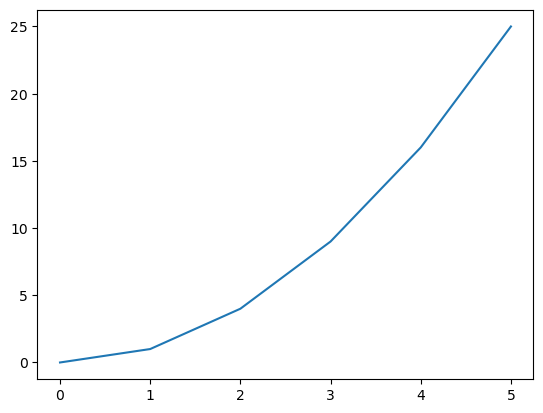

In [61]:
x = np.array([0,1,2,3,4,5])
y = x**2

plt.plot(x,y)
plt.show()

In [62]:
# Matplotlib Scatter Plot
# 👉 Create a scatter plot of 50 random points (x, y) between 0 and 10.

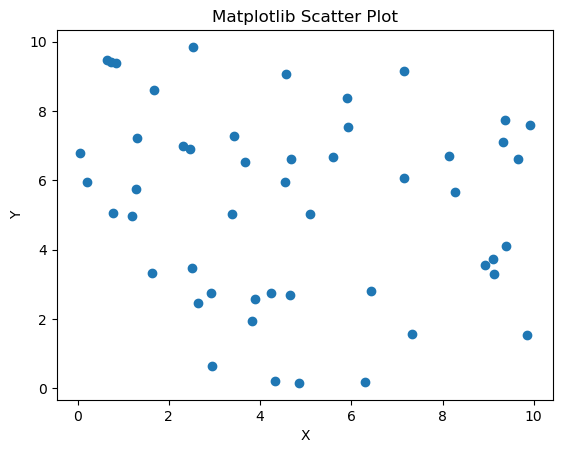

In [63]:
x = np.random.uniform(0,10,50)
y = np.random.uniform(0,10,50)

plt.scatter(x,y)
plt.title("Matplotlib Scatter Plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [64]:
# Matplotlib Bar Chart
# 👉 Create a bar chart showing sales for 5 products: [20, 35, 30, 35, 27]

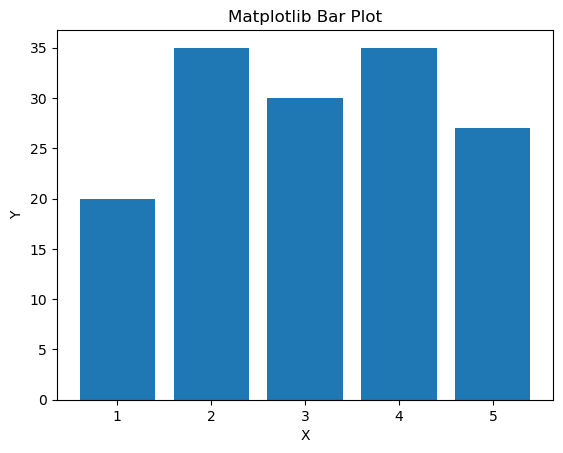

In [65]:
y = [20,35,30,35,27]
x = [1,2,3,4,5]

plt.bar(x,y)
plt.title("Matplotlib Bar Plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [66]:
# Combine NumPy + Matplotlib
# 👉 Generate 100 random values from a normal distribution. Plot their histogram with 10 bins.

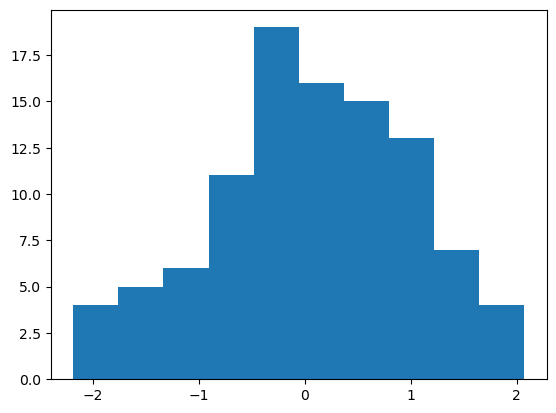

In [67]:
y = np.random.randn(100)

plt.hist(y, bins = 10)
plt.show()

In [68]:
y

array([ 0.57861186,  0.74159267,  0.28680121,  1.0029302 , -1.39559842,
       -1.29715887,  1.38413947,  0.75798626, -0.51577252,  0.87207188,
       -0.37108903, -1.75058469, -0.64694116, -0.46141778, -0.18465332,
        0.69374542, -2.1856007 ,  0.95840995, -0.35618169, -0.15024275,
       -0.38258018,  0.0612109 ,  0.47854027, -1.41083257,  1.86855358,
       -0.27006089, -1.23539222,  0.26291068, -1.89526668, -0.38412037,
       -0.19099301,  1.07538489,  2.0712738 ,  0.55484751, -0.29286724,
       -0.29641415, -0.72891243, -0.73023392, -0.42204576,  1.34834162,
        1.01639837,  0.10160088,  0.37734525,  0.13721695, -0.7155068 ,
       -0.18426644,  1.21637124,  1.29737617,  1.3917154 ,  0.03469573,
        0.93393411, -0.58350064, -0.99289059,  0.73124863,  0.42768036,
        0.33277773, -1.27699865, -0.14328995,  0.26920466, -0.0944275 ,
       -0.60519586,  0.38909154,  0.28850139,  0.13704249, -1.06585875,
        0.38936878,  1.97751913, -0.44952783, -2.02385661,  0.23

In [69]:
# 4th Sept, 2025

In [70]:
import pandas as pd
import numpy as np

In [71]:
# Read and Inspect Data
#👉 Given a CSV file employees.csv, how would you:

#Load it into Pandas?

#Show first 5 rows?

#Check column names and data types?

In [72]:
df = pd.read_csv("~chetandeshpande/downloads/employees.csv")

In [73]:
df.head()

,EmployeeID,Name,Department,Age,Salary,JoiningDate
0,101,Alice,HR,25,48000,2019-03-15
1,102,Bob,IT,32,60000,2018-07-10
2,103,Charlie,Finance,45,75000,2015-06-01
3,104,David,IT,28,52000,2020-01-25
4,105,Eva,HR,29,49000,2019-11-12


In [74]:
df.columns

Index(['EmployeeID', 'Name', 'Department', 'Age', 'Salary', 'JoiningDate'], dtype='object')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   EmployeeID   8 non-null      int64 
 1   Name         8 non-null      object
 2   Department   8 non-null      object
 3   Age          8 non-null      int64 
 4   Salary       8 non-null      int64 
 5   JoiningDate  8 non-null      object
dtypes: int64(3), object(3)
memory usage: 512.0+ bytes


In [76]:
# Filtering with Conditions
# 👉 From a DataFrame df with columns Age and Salary, select only rows where:

# Age > 30 and Salary > 50,000.

In [77]:
x = ((df['Age'] > 30) & (df['Salary'] > 50000))
print(x.head())

0    False
1     True
2     True
3    False
4    False
dtype: bool


In [78]:
filtered_df = df.query("Age > 30 and Salary > 50000")
print(filtered_df)

   EmployeeID     Name Department  Age  Salary JoiningDate
1         102      Bob         IT   32   60000  2018-07-10
2         103  Charlie    Finance   45   75000  2015-06-01
5         106    Frank    Finance   40   68000  2016-09-23
6         107    Grace         IT   35   72000  2017-08-14
7         108    Helen         HR   50   80000  2010-05-30


In [79]:
# Find the total salary per Department.

# Find the average age per Department.

In [80]:
total_salary = df.groupby("Department")["Salary"].sum()
print(total_salary)

Department
Finance    143000
HR         177000
IT         184000
Name: Salary, dtype: int64


In [81]:
ave_age_per_dept = df.groupby("Department")["Age"].mean()
print(ave_age_per_dept)

Department
Finance    42.500000
HR         34.666667
IT         31.666667
Name: Age, dtype: float64


In [82]:
# Missing Values
# 👉 How would you:

# Find which columns have missing values?

In [83]:
df.isnull().sum()

EmployeeID     0
Name           0
Department     0
Age            0
Salary         0
JoiningDate    0
dtype: int64

In [84]:
# NumPy Arrays

# Array Basics
# 👉 Create a NumPy array with numbers from 10 to 50 in steps of 5.

# Then reshape it into a 3×3 matrix.

In [85]:
x = np.arange(10,51,5)
print(x)

[10 15 20 25 30 35 40 45 50]


In [86]:
np.reshape(x, (3, 3))

array([[10, 15, 20],
       [25, 30, 35],
       [40, 45, 50]])

In [87]:
# Array Operations
# 👉 Given a = np.array([1,2,3,4,5]), compute:

# Square of each element.

# Mean and standard deviation.

In [88]:
a = np.array([1,2,3,4,5])

In [89]:
b = a**2
b

array([ 1,  4,  9, 16, 25])

In [90]:
c = a.mean()
c

3.0

In [91]:
d = a.std()
d

1.4142135623730951

In [92]:
# Boolean Indexing
# 👉 From arr = np.array([5, 12, 7, 20, 25, 2]), select only numbers greater than 10.# 

In [93]:
arr = np.array([5, 12, 7, 20, 25, 2])

In [94]:
x = arr > 10
x

array([False,  True, False,  True,  True, False])

In [95]:
# Loop with Condition
# 👉 Write a for loop to calculate the sum of squares of numbers from 1 to 5.

In [96]:
x = range(1,6)
total = 0

for i in x:
    y = i**2
    total = total + y
    print(total)

1
5
14
30
55


In [97]:
# Nested Loops
# 👉 Print a multiplication table for numbers 1 through 3, using nested loops.

In [98]:
for i in range(1,4):
    for j in range(1,4):
        print(i*j, end="\t")
    print()

1	2	3	
2	4	6	
3	6	9	


In [99]:
# Custom Function
# 👉 Write a function is_even(n) that:

# Takes an integer input.

# Returns True if even, False if odd.

# Then use it in a loop to print all even numbers from 1 to 20.

In [100]:
def is_even(n):
    if n%2==0:
        return True
    else:
        return False
    
for i in range(1,21):
    if is_even(i):
        print(i, "is even")

2 is even
4 is even
6 is even
8 is even
10 is even
12 is even
14 is even
16 is even
18 is even
20 is even


In [101]:
is_even(3)

False

In [102]:
# 5 th Sept, 2025

In [103]:
# Write a function factorial(n) that returns the factorial of a number using a loop.

In [104]:
n = int(input())

result = 1
for i in range(1, n+1):
    result = result*i
    
print(result)

KeyboardInterrupt: Interrupted by user

In [ ]:
# Write a function list_sum(numbers) that takes a list of numbers and returns their sum.

In [ ]:
import numpy as np

In [ ]:
n = int(input())
arr = np.arange(1,n+1)
print(arr)

def list_sum(num):
    sum = 0
    for i in num:
        sum = sum + i
    return sum
    
print("the total sum of", n, "is", list_sum(arr))

In [ ]:
# Write a function find_max(numbers) that returns the largest number from a list.

In [ ]:
numbers = list(map(int, input().split()))

def find_max(numbers):
    max_value = numbers[0]
    for i in numbers:
        if i > max_value:
            max_value = i
    return max_value
    
print("The largest number is:", find_max(numbers))

In [113]:
df = pd.read_csv("~chetandeshpande/downloads/Ch1_bike_sharing_data.csv")

In [114]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [115]:
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")

In [116]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   holiday     17379 non-null  int64         
 3   workingday  17379 non-null  int64         
 4   weather     17379 non-null  int64         
 5   temp        17379 non-null  float64       
 6   atemp       17379 non-null  float64       
 7   humidity    17379 non-null  int64         
 8   windspeed   17379 non-null  float64       
 9   casual      17379 non-null  int64         
 10  registered  17379 non-null  int64         
 11  count       17379 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1.6 MB


In [118]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.028770,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,34.483745,152.534035,187.017780
std,1.106918,0.167165,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,47.309050,147.946712,176.747895
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,16.000000,116.000000,141.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,46.000000,217.000000,277.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


In [128]:
df[["season"]].nunique()

season    4
dtype: int64

In [125]:
df[["weather"]].nunique()

weather    4
dtype: int64

In [131]:
df["weather"].unique()

array([1, 2, 3, 4])

In [1]:
#15th Sept

In [2]:
#1. Write a function to reverse a string.

In [5]:
def rev_str(s):
    return s[::-1]

In [8]:
rev_str("chetan")

'natehc'

In [9]:
#2. Write a function to check if a string is a palindrome.

In [12]:
def is_palindrome(s):
    return s==s[::-1]

In [13]:
is_palindrome("chetan")

False

In [14]:
#3. Return the most frequent element from a list.

In [16]:
from collections import Counter

def mostf(num):
    return Counter(num).most_common(1)[0][0]

In [23]:
print(mostf([1,2,3,4,4,5]))

4


In [24]:
#4. Generate the Fibonacci sequence up to n terms.

In [34]:
def fib_ser(n):
    fib = [0,1]
    for i in range(2,n):
        next_term = fib[-1] + fib[-2]
        fib.append(next_term)
    return fib[:n]
        
n = int(input("Enter number of terms: "))
print(fib_ser(n))        

Enter number of terms: 7
[0, 1, 1, 2, 3, 5, 8]


In [35]:
#5. Write a function to find all duplicate elements in a list.

In [47]:
def dupli(lst):
    duplicates = []
    for i in lst:
        if lst.count(i) > 1 and i not in duplicates:
            duplicates.append(i)
    print(duplicates)

In [48]:
dupli([1, 1, 2, 3, 4, 2, 5, 1])

[1, 2]
